In [1]:
import pandas as pd
import openpyxl
import json
import ast
import os
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data extracting post

In [2]:
def car_details(new_car_detail):
    # Initialize an empty DataFrame to hold the flattened JSON data
    flattened_df = pd.DataFrame()

    # Loop through each row in 'new_car_detail'
    for index, row in new_car_detail.items():
        # Convert the string to a dictionary if necessary
        if isinstance(row, str):
            try:
                row = ast.literal_eval(row)  # Safely evaluate the string to a dictionary
            except Exception as e:
                print(f"Skipping row {index} due to error: {e}")
                continue
        
        # Check if 'trendingText' exists and flatten it
        if isinstance(row, dict) and 'trendingText' in row:
            trending_text = row.pop('trendingText')
            if isinstance(trending_text, dict):
                row.update(trending_text)  # Flatten the 'trendingText' dictionary into the main dictionary
        
        # Convert the flattened dictionary into a DataFrame and concatenate it with the main DataFrame
        flattened_df = pd.concat([flattened_df, pd.DataFrame([row])], ignore_index=True)

    # Display the final DataFrame
    return flattened_df


In [3]:
def car_overview(overview):
    data_dict = {}
    df_data = pd.DataFrame()
    # Loop through the car_overview to extract keys and values
    for index, row in overview.items():
        for item in row['top']:
            key = item['key']
            value = item['value']
            
            # Check if key already exists in the dictionary, if not, create a new list
            if key not in data_dict:
                data_dict[key] = []
            
            # Append the value to the respective key's list
            data_dict[key] = value
        df_data = pd.concat([df_data, pd.DataFrame([data_dict])], ignore_index=True)

    # Create a DataFrame from the dictionary
    #df = pd.DataFrame(data_dict)

    return df_data

In [4]:
def car_feature(col_car_features):
    # Initialize a dictionary to store all features
    data_dict = {}
    # Initialize a dictionary to store all features
    df_data =pd.DataFrame()

    # Extracting 'data' features
    for index, row in col_car_features.items():
        top_features = ', '.join(item['value'] for item in row['top'])
        data_dict['Top Feature'] = top_features
        for section in row['data']:
            features = ''
            for item in section['list']:
                features = ', '.join(item['value'] for item in section['list'])
            data_dict[section['subHeading']] = features
        
        #df_data = pd.concat([df_data, pd.DataFrame([top_features_dict])], ignore_index=True)
        df_data = pd.concat([df_data, pd.DataFrame([data_dict])], ignore_index=True)

    return df_data


In [5]:
def car_specs(col_car_specs):
# Initialize an empty DataFrame
    df_data = pd.DataFrame()

    for index, row in col_car_specs.items():
        top_dict = {}
        for item in row['top']:
            key = item['key']
            value = item['value']
            
            # Check if key already exists in the dictionary, if not, create a new list
            if key not in top_dict:
                top_dict[key] = []

            # Append the value to the respective key's list
            #top_dict[key].append(value)
            top_dict[key] = value

        # Convert top_dict to DataFrame and concatenate
        data_dict = pd.DataFrame([top_dict])
        df_data = pd.concat([df_data, data_dict], ignore_index=True)
        
        for q in row['data']: 
            for section in q['list']:
                key1 = section['key']
                value1 = section['value']
                df_data[key1] = value1

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(df_data)

    return df


In [6]:
# Read the Excel file
#book1 = pd.read_excel('data/bangalore_cars.xlsx', engine='openpyxl')
#book1 = pd.read_excel('data/chennai_cars.xlsx', engine='openpyxl')
#book1 = pd.read_excel('data/delhi_cars.xlsx', engine='openpyxl')
#book1 = pd.read_excel('data/hyderabad_cars.xlsx', engine='openpyxl')
#book1 = pd.read_excel('data/jaipur_cars.xlsx', engine='openpyxl')
#book1 = pd.read_excel('data/kolkata_cars.xlsx', engine='openpyxl')
final_df = {}
path = 'data/'
for file in os.listdir(path):
    current_file = os.path.join(path, file)
    book1 = pd.read_excel(current_file, engine='openpyxl')


    # Extract the 'new_car_detail' column as a Series
    col_car_detail = book1['new_car_detail'].apply(eval)
    col_car_overview = book1['new_car_overview'].apply(eval)
    col_car_features = book1['new_car_feature'].apply(ast.literal_eval)
    col_car_specs = book1['new_car_specs'].apply(ast.literal_eval)

    df1 = car_details(col_car_detail)
    df2 = car_overview(col_car_overview)
    df3 = car_feature(col_car_features)
    df4 = car_specs(col_car_specs)

    city = file.replace('_cars.xlsx','')

    result = pd.concat([df1, df2, df3, df4], axis=1)
    result['City'] = city

     # Store the result DataFrame in the dictionary with the city name as the key
    final_df[city] = result

In [7]:
list_of_dataframes = list(final_df.keys())
list_of_dataframes

for each in list_of_dataframes:
    duplicate_columns = final_df[each].columns[final_df[each].columns.duplicated()].tolist()
    print(f"Duplicate columns in {each}:", duplicate_columns)

Duplicate columns in bangalore: ['Seats']
Duplicate columns in chennai: ['Seats']
Duplicate columns in delhi: ['Seats']
Duplicate columns in hyderabad: ['Seats']
Duplicate columns in jaipur: ['Seats']
Duplicate columns in kolkata: ['Seats']


In [8]:
final_df['bangalore']['Seats']

,Seats,Seats
0,5 Seats,5
1,5 Seats,5
2,5 Seats,5
3,5 Seats,5
4,5 Seats,5
...,...,...
1476,7 Seats,7
1477,5 Seats,5
1478,5 Seats,5
1479,5 Seats,5


Dropping duplicated columns from each dataframe

In [9]:
for each in list_of_dataframes:
    final_df[each] = final_df[each].loc[:, ~final_df[each].columns.duplicated()]

In [10]:
final_df['bangalore']['Seats']

0       5 Seats
1       5 Seats
2       5 Seats
3       5 Seats
4       5 Seats
         ...   
1476    7 Seats
1477    5 Seats
1478    5 Seats
1479    5 Seats
1480    5 Seats
Name: Seats, Length: 1481, dtype: object

In [11]:
final_df['bangalore'] = final_df['bangalore'].reset_index(drop=True)
final_df['chennai'] = final_df['chennai'].reset_index(drop=True)
final_df['delhi'] = final_df['delhi'].reset_index(drop=True)
final_df['hyderabad'] = final_df['hyderabad'].reset_index(drop=True)
final_df['jaipur'] = final_df['jaipur'].reset_index(drop=True)
final_df['kolkata'] = final_df['kolkata'].reset_index(drop=True)

all_df =  pd.concat([final_df['bangalore'], final_df['chennai'], final_df['delhi'], final_df['hyderabad'], final_df['jaipur'], final_df['kolkata']])

In [12]:
all_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,NaN,14,190mm,bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14,190mm,bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,14,14,190mm,bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,14,14,190mm,bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14,190mm,bangalore


In [13]:
all_df.to_csv('csv/final.csv', index=False)

In [14]:
copy_all_df = all_df.copy()
copy_all_df.shape

(8369, 75)

In [15]:
copy_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1380
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   it                        8369 non-null   int64 
 1   ft                        8369 non-null   object
 2   bt                        8369 non-null   object
 3   km                        8369 non-null   object
 4   transmission              8369 non-null   object
 5   ownerNo                   8369 non-null   int64 
 6   owner                     8369 non-null   object
 7   oem                       8369 non-null   object
 8   model                     8369 non-null   object
 9   modelYear                 8369 non-null   int64 
 10  centralVariantId          8369 non-null   int64 
 11  variantName               8369 non-null   object
 12  price                     8369 non-null   object
 13  priceActual               8369 non-null   object
 14  priceSaving               836

finding duplicated rows

In [16]:
copy_all_df[copy_all_df.duplicated()]

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,City
79,0,Petrol,Hatchback,"60,000",Manual,2,2nd Owner,Maruti,Maruti Ritz,2014,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,NaN,14,190mm,bangalore
114,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Hyundai,Hyundai Venue,2019,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14,190mm,bangalore
197,0,Petrol,Sedan,"50,000",Manual,1,1st Owner,Fiat,Fiat Linea,2009,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,15,14,190mm,bangalore
288,0,Petrol,Sedan,"40,000",Manual,1,1st Owner,Maruti,Maruti Swift Dzire,2016,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,NaN,14,190mm,bangalore
399,0,Petrol,Sedan,"70,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2019,...,Drum,165 Kmph,12.9 Seconds,Tubeless,5,256-liters,16,14,190mm,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,Diesel,Hatchback,"90,000",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2014,...,Drum,168 Kmph,14.20 Seconds,"Tubeless,Radial",5,410-litres,NaN,16,190mm,kolkata
1145,0,Diesel,Sedan,"30,000",Manual,1,1st Owner,Volkswagen,Volkswagen Vento,2014,...,Drum,168 Kmph,14.20 Seconds,"Tubeless,Radial",5,410-litres,15,16,190mm,kolkata
1166,0,Petrol,Minivans,"50,000",Manual,3,3rd Owner,Maruti,Maruti Eeco,2010,...,Drum,168 Kmph,14.20 Seconds,"Tubeless,Radial",5,410-litres,NaN,16,190mm,kolkata
1351,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Swift,2021,...,Drum,168 Kmph,14.20 Seconds,"Tubeless,Radial",5,410-litres,NaN,16,190mm,kolkata


removing duplicated columns

In [17]:
copy_all_df = copy_all_df.drop_duplicates(keep='last')
copy_all_df.shape

(8298, 75)

Selecting most needed feature for ML

In [18]:
# selecting most needed features will make out process easy such as finding outliers, standadising data formats 
# & finding numarical and catagorical columns

In [19]:
copy_all_df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'imgUrl', 'heading',
       'desc', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Top Feature', 'Comfort', 'Interior', 'Exterior',
       'Safety', 'Entertainment', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Typ

In [20]:
df_for_ml = copy_all_df[['ft', 'bt', 'km', 'City', 'oem',
       'transmission', 'ownerNo', 'Seats', 'Year of Manufacture',
       'Registration Year', 'modelYear', 'price']]

df_for_ml.head()

,ft,bt,km,City,oem,transmission,ownerNo,Seats,Year of Manufacture,Registration Year,modelYear,price
0,Petrol,Hatchback,"1,20,000",bangalore,Maruti,Manual,3,5 Seats,2015,2015,2015,₹ 4 Lakh
1,Petrol,SUV,"32,706",bangalore,Ford,Manual,2,5 Seats,2018,Feb 2018,2018,₹ 8.11 Lakh
2,Petrol,Hatchback,"11,949",bangalore,Tata,Manual,1,5 Seats,2018,Sept 2018,2018,₹ 5.85 Lakh
3,Petrol,Sedan,"17,794",bangalore,Hyundai,Manual,1,5 Seats,2014,Dec 2014,2014,₹ 4.62 Lakh
4,Diesel,SUV,"60,000",bangalore,Maruti,Manual,1,5 Seats,2015,2015,2015,₹ 7.90 Lakh


In [21]:
df_for_ml = df_for_ml.rename(columns={'ft': 'fuel_type','oem': 'brand', 'bt': 'body_type', 'km': 'km_driven',
                                      'City': 'city', 'transmission': 'transmission_type', 'oem': 'brand',
                                      'ownerNo': 'no_of_owner', 'Seats': 'seats', 'Year of Manufacture': 'manufacture_year',
                                    'Registration Year': 'registration_year','modelYear': 'model_year'})
df_for_ml.head()

,fuel_type,body_type,km_driven,city,brand,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price
0,Petrol,Hatchback,"1,20,000",bangalore,Maruti,Manual,3,5 Seats,2015,2015,2015,₹ 4 Lakh
1,Petrol,SUV,"32,706",bangalore,Ford,Manual,2,5 Seats,2018,Feb 2018,2018,₹ 8.11 Lakh
2,Petrol,Hatchback,"11,949",bangalore,Tata,Manual,1,5 Seats,2018,Sept 2018,2018,₹ 5.85 Lakh
3,Petrol,Sedan,"17,794",bangalore,Hyundai,Manual,1,5 Seats,2014,Dec 2014,2014,₹ 4.62 Lakh
4,Diesel,SUV,"60,000",bangalore,Maruti,Manual,1,5 Seats,2015,2015,2015,₹ 7.90 Lakh


In [22]:
df_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8298 entries, 0 to 1380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fuel_type          8298 non-null   object
 1   body_type          8298 non-null   object
 2   km_driven          8298 non-null   object
 3   city               8298 non-null   object
 4   brand              8298 non-null   object
 5   transmission_type  8298 non-null   object
 6   no_of_owner        8298 non-null   int64 
 7   seats              8298 non-null   object
 8   manufacture_year   8298 non-null   int64 
 9   registration_year  8298 non-null   object
 10  model_year         8298 non-null   int64 
 11  price              8298 non-null   object
dtypes: int64(3), object(9)
memory usage: 842.8+ KB


Data cleaning

In [23]:

df_for_ml['km_driven'] = pd.to_numeric(df_for_ml['km_driven'].str.replace(',', ''), errors='raise')

In [24]:
def extract_year(value):
    # Use a regular expression to find a four-digit year
    match = re.search(r'\d{4}', value)
    if match:
        return int(match.group(0))  # Return the matched year
    return 0  # Return None if no year is found

df_for_ml['registration_year'] = df_for_ml['registration_year'].apply(extract_year)

In [25]:
def convert_price(value):
    # Remove ₹ symbol and strip spaces
    value = value.replace('₹', '').replace(',', '').strip()  # Also remove commas if present
    
    # Check for "Lakh" or "crore" and convert accordingly
    if 'Lakh' in value:
        value = value.replace('Lakh', '').strip()
        return float(value) * 100000  # Convert to Lakh
    
    elif 'Crore' in value:
        value = value.replace('Crore', '').strip()
        return float(value) * 10000000  # Convert to crore
    
    return float(value)  # Return as float if no unit (Lakh/crore) is found

# Apply the conversion function to the 'price' column
df_for_ml['price'] = df_for_ml['price'].apply(convert_price)


In [26]:
df_for_ml.head()

,fuel_type,body_type,km_driven,city,brand,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price
0,Petrol,Hatchback,120000,bangalore,Maruti,Manual,3,5 Seats,2015,2015,2015,400000.0
1,Petrol,SUV,32706,bangalore,Ford,Manual,2,5 Seats,2018,2018,2018,811000.0
2,Petrol,Hatchback,11949,bangalore,Tata,Manual,1,5 Seats,2018,2018,2018,585000.0
3,Petrol,Sedan,17794,bangalore,Hyundai,Manual,1,5 Seats,2014,2014,2014,462000.0
4,Diesel,SUV,60000,bangalore,Maruti,Manual,1,5 Seats,2015,2015,2015,790000.0


In [27]:
df_for_ml['seats'] = df_for_ml['seats'].str.replace('Seats', '').str.strip().astype(int)


In [28]:
df_for_ml.head()

,fuel_type,body_type,km_driven,city,brand,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price
0,Petrol,Hatchback,120000,bangalore,Maruti,Manual,3,5,2015,2015,2015,400000.0
1,Petrol,SUV,32706,bangalore,Ford,Manual,2,5,2018,2018,2018,811000.0
2,Petrol,Hatchback,11949,bangalore,Tata,Manual,1,5,2018,2018,2018,585000.0
3,Petrol,Sedan,17794,bangalore,Hyundai,Manual,1,5,2014,2014,2014,462000.0
4,Diesel,SUV,60000,bangalore,Maruti,Manual,1,5,2015,2015,2015,790000.0


In [29]:
df_for_ml.to_csv('csv/csv_for_ml.csv', index=False)

In [30]:
df_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8298 entries, 0 to 1380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel_type          8298 non-null   object 
 1   body_type          8298 non-null   object 
 2   km_driven          8298 non-null   int64  
 3   city               8298 non-null   object 
 4   brand              8298 non-null   object 
 5   transmission_type  8298 non-null   object 
 6   no_of_owner        8298 non-null   int64  
 7   seats              8298 non-null   int64  
 8   manufacture_year   8298 non-null   int64  
 9   registration_year  8298 non-null   int64  
 10  model_year         8298 non-null   int64  
 11  price              8298 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 842.8+ KB


In [31]:
df_ml_1 = df_for_ml.copy()

In [32]:
df_ml_1['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [33]:
df_ml_1[df_ml_1['body_type']=='']

,fuel_type,body_type,km_driven,city,brand,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price
482,Petrol,,10500,delhi,Toyota,Automatic,1,7,2023,2023,2023,11900000.0
1005,Petrol,,13500,hyderabad,Maruti,Manual,1,5,2019,2019,2019,495000.0
1026,Petrol,,16415,hyderabad,Maruti,Manual,1,5,2020,2020,2020,520000.0
1126,Petrol,,21166,kolkata,Maruti,Manual,1,5,2019,2019,2019,395000.0


In [34]:
df_ml_1 = df_ml_1[df_ml_1['body_type'] != '']

In [35]:
df_ml_1.describe()

,km_driven,no_of_owner,seats,manufacture_year,registration_year,model_year,price
count,8.294000e+03,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8.294000e+03
mean,5.902498e+04,1.359296,5.202556,2016.546781,2016.615867,2016.504582,9.573715e+05
std,7.431398e+04,0.640234,0.663033,3.809610,3.809084,3.916550,1.415933e+06
min,0.000000e+00,0.000000,2.000000,2002.000000,2002.000000,1985.000000,2.016100e+04
25%,3.000000e+04,1.000000,5.000000,2014.000000,2014.000000,2014.000000,3.990000e+05
50%,5.381900e+04,1.000000,5.000000,2017.000000,2017.000000,2017.000000,6.010000e+05
75%,8.000000e+04,2.000000,5.000000,2019.000000,2019.000000,2019.000000,9.500000e+05
max,5.500000e+06,5.000000,10.000000,2023.000000,2023.000000,2023.000000,4.150000e+07


In [36]:
df_ml_1.describe(include= 'object')

,fuel_type,body_type,city,brand,transmission_type
count,8294,8294,8294,8294,8294
unique,5,10,6,33,2
top,Petrol,Hatchback,delhi,Maruti,Manual
freq,5497,3543,1475,2227,5999


In [37]:
df_ml_1['body_type'].value_counts()

body_type
Hatchback        3543
SUV              2211
Sedan            2149
MUV               345
Minivans           22
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [38]:
df_ml_1['city'].value_counts()

city
delhi        1475
bangalore    1471
hyderabad    1467
chennai      1412
kolkata      1367
jaipur       1102
Name: count, dtype: int64

In [39]:
df_ml_1['brand'].value_counts()

brand
Maruti                2227
Hyundai               1640
Honda                  857
Tata                   429
Mahindra               375
Toyota                 321
Renault                310
Ford                   308
Volkswagen             287
Mercedes-Benz          244
BMW                    182
Skoda                  158
Kia                    157
Audi                   156
Jeep                   112
MG                      88
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  34
Fiat                    30
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

In [40]:
df_ml_1['brand'] = df_ml_1['brand'].replace({
    'Mahindra Renault': 'Mahindra',
    'Mahindra Ssangyong': 'Mahindra'
})

In [41]:
df_ml_1['transmission_type'].value_counts()

transmission_type
Manual       5999
Automatic    2295
Name: count, dtype: int64

In [42]:
df_ml_1['no_of_owner'].value_counts()

no_of_owner
1    5832
2    1962
3     371
4      80
0      32
5      17
Name: count, dtype: int64

In [43]:
df_ml_1['seats'].value_counts()

seats
5     7297
7      720
6      101
4       92
8       61
9       11
2        7
10       5
Name: count, dtype: int64

Encoding categorical features

In [44]:
le = LabelEncoder()
oe = OneHotEncoder()


In [45]:
df_ml_1.select_dtypes(include=['object'])

,fuel_type,body_type,city,brand,transmission_type
0,Petrol,Hatchback,bangalore,Maruti,Manual
1,Petrol,SUV,bangalore,Ford,Manual
2,Petrol,Hatchback,bangalore,Tata,Manual
3,Petrol,Sedan,bangalore,Hyundai,Manual
4,Diesel,SUV,bangalore,Maruti,Manual
...,...,...,...,...,...
1376,Petrol,Hatchback,kolkata,Maruti,Manual
1377,Petrol,Hatchback,kolkata,Maruti,Manual
1378,Petrol,Sedan,kolkata,Mercedes-Benz,Automatic
1379,Petrol,Hatchback,kolkata,Maruti,Manual


Label Encoding

In [46]:
labe_encoding_columns = ['body_type','brand']
for i in labe_encoding_columns:
    df_ml_1['encoded_'+str(i)] = le.fit_transform(df_ml_1[i])

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


one hot encoding

In [56]:

# List of columns to one-hot encode
df100 = pd.DataFrame()
onehot_encoding_columns = ['fuel_type', 'city', 'transmission_type']

# Instantiate the OneHotEncoder (with sparse_output=False to get a dense array)
oe = OneHotEncoder(sparse_output=False)

# Fit and transform the encoder on the selected columns
encoded_data = oe.fit_transform(df_ml_1[onehot_encoding_columns])

# Create a DataFrame with the one-hot encoded data
encoded_columns_df = pd.DataFrame(encoded_data, columns=oe.get_feature_names_out(onehot_encoding_columns))

# Drop the original categorical columns from df_ml_1
df_ml_1_dropped = df_ml_1.drop(columns=onehot_encoding_columns)

# Concatenate the original DataFrame (dropping the original categorical columns) with the new one-hot encoded DataFrame
df_ml_1_encoded = pd.concat([df_ml_1_dropped.reset_index(drop=True), encoded_columns_df], axis=1)

# Save the OneHotEncoder object using pickle for later use
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(oe, f)

# To check the final encoded DataFrame
df_ml_1_encoded


,body_type,km_driven,brand,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_body_type,...,fuel_type_Lpg,fuel_type_Petrol,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata,transmission_type_Automatic,transmission_type_Manual
0,Hatchback,120000,Maruti,3,5,2015,2015,2015,400000.0,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SUV,32706,Ford,2,5,2018,2018,2018,811000.0,7,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Hatchback,11949,Tata,1,5,2018,2018,2018,585000.0,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Sedan,17794,Hyundai,1,5,2014,2014,2014,462000.0,8,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,SUV,60000,Maruti,1,5,2015,2015,2015,790000.0,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,Hatchback,10000,Maruti,1,5,2022,2022,2022,510000.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8290,Hatchback,120000,Maruti,1,5,2014,2014,2014,180000.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8291,Sedan,50000,Mercedes-Benz,3,5,2011,2011,2011,550000.0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8292,Hatchback,40000,Maruti,1,5,2012,2012,2012,140000.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [281]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

Outlier detection and treatment

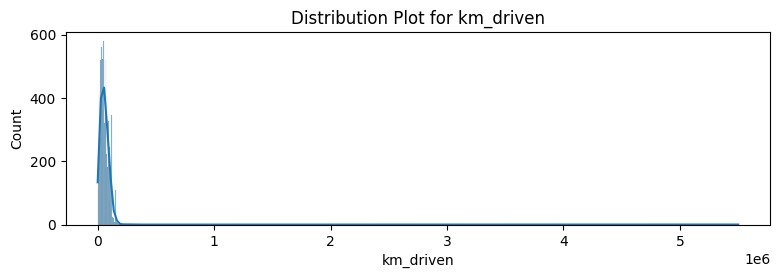

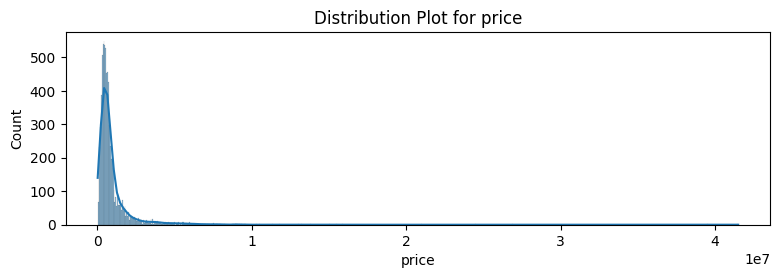

In [282]:
for column in ['km_driven','price']:   
    plt.figure(figsize=(20,2.5))
    plt.subplot(1,2,1)
    sns.histplot(data=df_ml_1, x=column, kde=True)
    plt.title(f'Distribution Plot for {column}')

In [120]:
# price and kilometer driven datas are right skewed

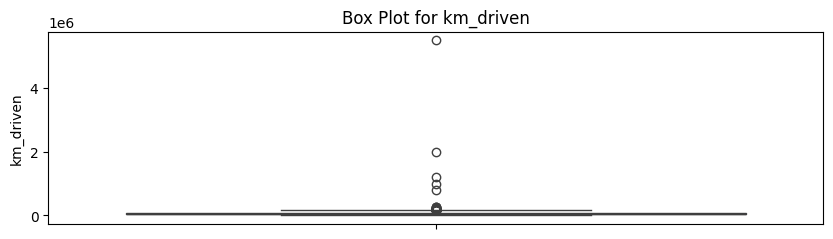

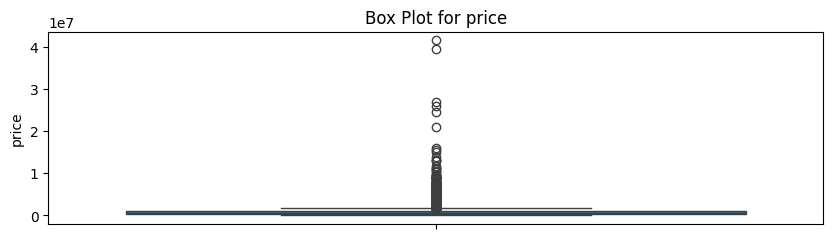

In [158]:
def boxplot_vis(df, col):
    for column in col:
        if column in df.columns:
            plt.figure(figsize=(10, 2.5))
            sns.boxplot(data=df[column])
            plt.title(f'Box Plot for {column}')
            plt.show()
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")
boxplot_vis(df_ml_1,['km_driven','price'])

In [121]:
# price and kilometer driven has outliers

In [172]:
df_ml_2 = df_ml_1.copy()

Sqrt transform¶

In [173]:
columns_to_log_transform = ['km_driven', 'price']

df_ml_2[['sqrt_km', 'sqrt_price']] = df_ml_2[columns_to_log_transform].apply(np.sqrt)

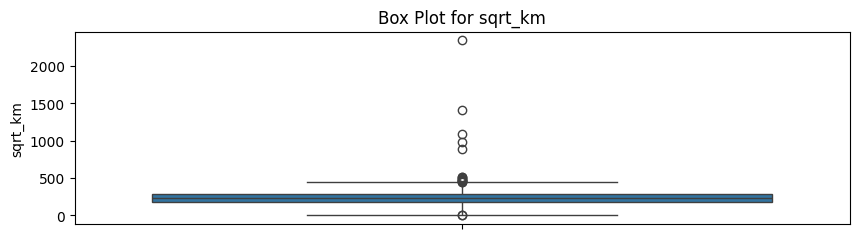

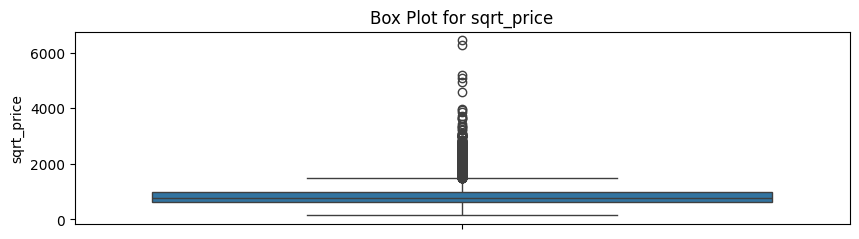

In [174]:
boxplot_vis(df_ml_2, ['sqrt_km','sqrt_price'])

In [171]:
df_ml_2.drop(['sqrt_km', 'sqrt_price'], axis=1, inplace=True)
df_ml_2.head()

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type
0,Petrol,Hatchback,120000,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1
1,Petrol,SUV,32706,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1
2,Petrol,Hatchback,11949,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1
3,Petrol,Sedan,17794,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1
4,Diesel,SUV,60000,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1


In [175]:
# sqrt transform is not effective

Log Transform

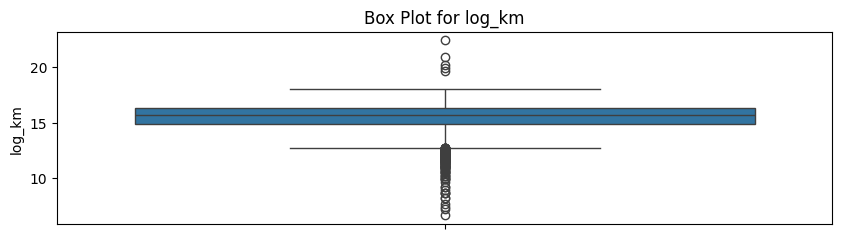

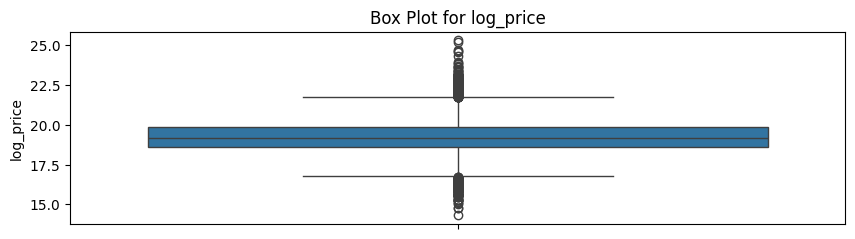

In [176]:
columns_to_log_transform = ['km_driven', 'price']

df_ml_2[['log_km', 'log_price']] = df_ml_2[columns_to_log_transform].apply(np.log2)
boxplot_vis(df_ml_2, ['log_km', 'log_price'])

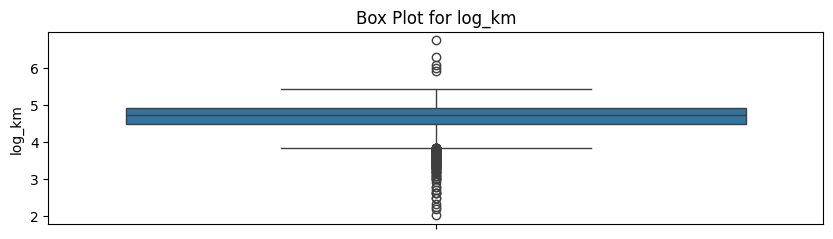

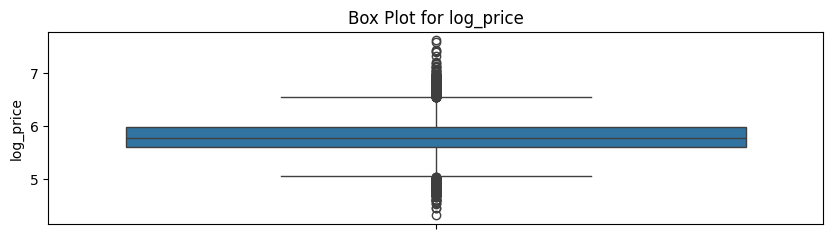

In [177]:
df_ml_2[['log_km', 'log_price']] = df_ml_2[columns_to_log_transform].apply(np.log10)
boxplot_vis(df_ml_2, ['log_km', 'log_price'])

In [166]:
df_ml_2.drop(['log_km', 'log_price'], axis=1, inplace=True)
df_ml_2.head()

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type
0,Petrol,Hatchback,120000,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1
1,Petrol,SUV,32706,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1
2,Petrol,Hatchback,11949,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1
3,Petrol,Sedan,17794,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1
4,Diesel,SUV,60000,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1


In [167]:
# log transform is not effective

In [181]:
df_ml_2.describe(

)

c:\Users\User\Desktop\MDT 28\Assignments\Car_Dheko\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,km_driven,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,sqrt_km,sqrt_price,log_km,log_price,boxcox_price
count,8.294000e+03,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8.294000e+03,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000
mean,5.902498e+04,1.359296,5.202556,2016.546781,2016.615867,2016.504582,9.573715e+05,2.983964,4.979865,2.412105,0.723294,229.225815,876.103819,-inf,5.804706,7.260167
std,7.431398e+04,0.640234,0.663033,3.809610,3.809084,3.916550,1.415933e+06,1.432381,2.706550,1.703495,0.447397,80.506435,435.702235,NaN,0.361368,0.209187
min,0.000000e+00,0.000000,2.000000,2002.000000,2002.000000,1985.000000,2.016100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,141.989436,-inf,4.304512,6.218386
25%,3.000000e+04,1.000000,5.000000,2014.000000,2014.000000,2014.000000,3.990000e+05,1.000000,2.000000,1.000000,0.000000,173.205081,631.664468,4.477121,5.600973,7.147320
50%,5.381900e+04,1.000000,5.000000,2017.000000,2017.000000,2017.000000,6.010000e+05,4.000000,7.000000,2.000000,1.000000,231.989224,775.241898,4.730936,5.778874,7.253985
75%,8.000000e+04,2.000000,5.000000,2019.000000,2019.000000,2019.000000,9.500000e+05,4.000000,8.000000,4.000000,1.000000,282.842712,974.679434,4.903090,5.977724,7.368017
max,5.500000e+06,5.000000,10.000000,2023.000000,2023.000000,2023.000000,4.150000e+07,4.000000,9.000000,5.000000,1.000000,2345.207880,6442.049363,6.740363,7.618048,8.129505


Column 'boxcox_km' does not exist in the DataFrame.


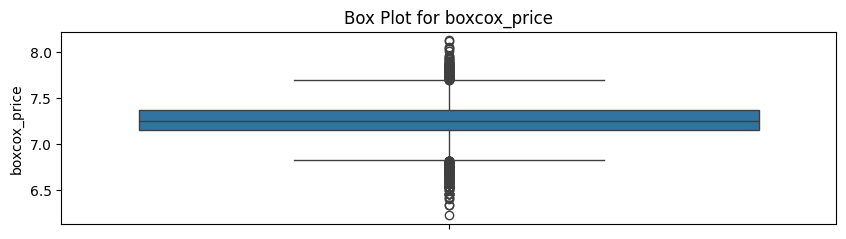

In [190]:
from scipy.stats import boxcox


df_ml_2['boxcox_price'], _ = boxcox(df_ml_2['price'])

boxplot_vis(df_ml_2, ['boxcox_km', 'boxcox_price'])

Yeo-Johnson Transformation

In [193]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_ml_2['yeo_km'] = pt.fit_transform(df_ml_2[['km_driven']])
df_ml_2['yeo_price'] = pt.fit_transform(df_ml_2[['price']])

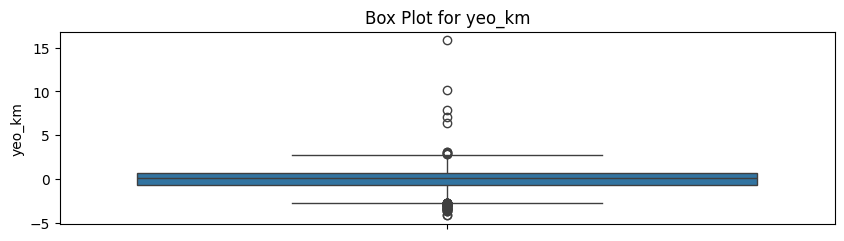

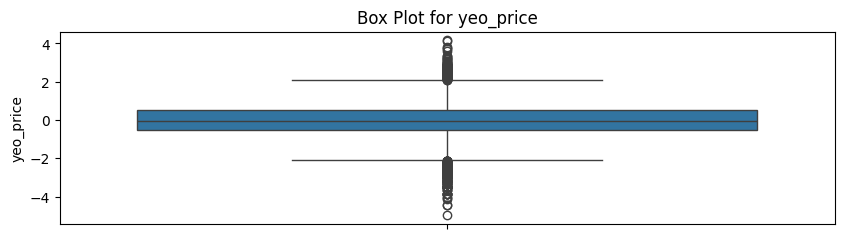

In [194]:
boxplot_vis(df_ml_2, ['yeo_km', 'yeo_price'])

Invers transform

In [196]:
#df_ml_2['inverse_km'] = df_ml_2['km_driven'].apply(  lambda x: 1/x  )
df_ml_2['inverse_price'] = df_ml_2['price'].apply(  lambda x: 1/x  )

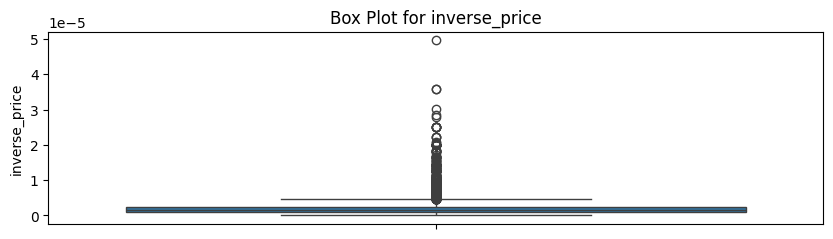

In [198]:
boxplot_vis(df_ml_2, ['inverse_price'])

In [200]:
# datatransform methods are not effective on ouliers
# so i am going to use capping method

In [199]:
df_ml_2

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,...,encoded_city,encoded_transmission_type,sqrt_km,sqrt_price,log_km,log_price,boxcox_price,yeo_km,yeo_price,inverse_price
0,Petrol,Hatchback,120000.0,bangalore,Manual,3,5,2015,2015,2015,...,0,1,346.410162,632.455532,5.079181,5.602060,7.147985,1.421416,-0.536305,0.000003
1,Petrol,SUV,32706.0,bangalore,Manual,2,5,2018,2018,2018,...,0,1,180.848002,900.555384,4.514627,5.909021,7.329224,-0.568363,0.330141,0.000001
2,Petrol,Hatchback,11949.0,bangalore,Manual,1,5,2018,2018,2018,...,0,1,109.311482,764.852927,4.077332,5.767156,7.247096,-1.619642,-0.062486,0.000002
3,Petrol,Sedan,17794.0,bangalore,Manual,1,5,2014,2014,2014,...,0,1,133.394153,679.705819,4.250274,5.664642,7.186011,-1.244952,-0.354517,0.000002
4,Diesel,SUV,60000.0,bangalore,Manual,1,5,2015,2015,2015,...,0,1,244.948974,888.819442,4.778151,5.897627,7.322729,0.255409,0.299092,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Petrol,Hatchback,10000.0,kolkata,Manual,1,5,2022,2022,2022,...,5,1,100.000000,714.142843,4.000000,5.707570,7.211771,-1.771942,-0.231365,0.000002
1377,Petrol,Hatchback,120000.0,kolkata,Manual,1,5,2014,2014,2014,...,5,1,346.410162,424.264069,5.079181,5.255273,6.926763,1.421416,-1.593905,0.000006
1378,Petrol,Sedan,50000.0,kolkata,Automatic,3,5,2011,2011,2011,...,5,0,223.606798,741.619849,4.698970,5.740363,7.231273,-0.009614,-0.138129,0.000002
1379,Petrol,Hatchback,40000.0,kolkata,Manual,1,5,2012,2012,2012,...,5,1,200.000000,374.165739,4.602060,5.146128,6.853299,-0.313066,-1.945112,0.000007


In [201]:
df_ml_2.drop(['sqrt_km', 'sqrt_price', 'log_km','log_price','boxcox_price',	'yeo_km','yeo_price','inverse_price'], axis=1, inplace=True)
df_ml_2.head()

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type
0,Petrol,Hatchback,120000.0,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1
1,Petrol,SUV,32706.0,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1
2,Petrol,Hatchback,11949.0,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1
3,Petrol,Sedan,17794.0,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1
4,Diesel,SUV,60000.0,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1


Outlier Capping method usig IQR

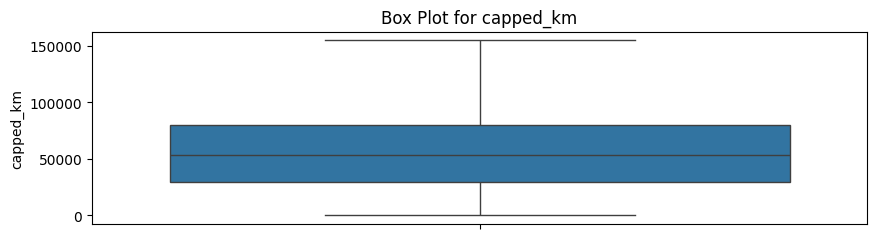

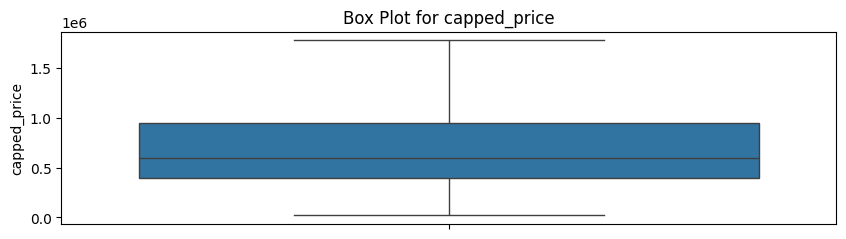

In [209]:
def outlier_capping(df, column, new_col):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[new_col] = df[column].clip(lower_threshold, upper_threshold)

outlier_capping(df_ml_2, 'km_driven', 'capped_km')
outlier_capping(df_ml_2, 'price', 'capped_price')

boxplot_vis(df_ml_2, ['capped_km', 'capped_price'])

In [203]:
df_ml_2

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,capped_km,capped_price
0,Petrol,Hatchback,120000.0,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1,120000.0,400000.0
1,Petrol,SUV,32706.0,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1,32706.0,811000.0
2,Petrol,Hatchback,11949.0,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1,11949.0,585000.0
3,Petrol,Sedan,17794.0,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1,17794.0,462000.0
4,Diesel,SUV,60000.0,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1,60000.0,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Petrol,Hatchback,10000.0,kolkata,Manual,1,5,2022,2022,2022,510000.0,4,2,5,1,10000.0,510000.0
1377,Petrol,Hatchback,120000.0,kolkata,Manual,1,5,2014,2014,2014,180000.0,4,2,5,1,120000.0,180000.0
1378,Petrol,Sedan,50000.0,kolkata,Automatic,3,5,2011,2011,2011,550000.0,4,8,5,0,50000.0,550000.0
1379,Petrol,Hatchback,40000.0,kolkata,Manual,1,5,2012,2012,2012,140000.0,4,2,5,1,40000.0,140000.0


Standard Scaling

In [210]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_ml_2[['ss_capped_km', 'ss_capped_price']] = ss.fit_transform(df_ml_2[['capped_km', 'capped_price']])


In [211]:
df_ml_2.head()

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,capped_km,capped_price,ss_capped_km,ss_capped_price
0,Petrol,Hatchback,120000.0,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1,120000.0,400000.0,1.844475,-0.713344
1,Petrol,SUV,32706.0,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1,32706.0,811000.0,-0.740226,0.126143
2,Petrol,Hatchback,11949.0,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1,11949.0,585000.0,-1.354823,-0.335473
3,Petrol,Sedan,17794.0,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1,17794.0,462000.0,-1.181757,-0.586706
4,Diesel,SUV,60000.0,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1,60000.0,790000.0,0.067926,0.083250


In [213]:
# Calculate for the 'price' column
mean_price = df_ml_2['ss_capped_price'].mean()
median_price = df_ml_2['ss_capped_price'].median()
std_dev_price = df_ml_2['ss_capped_price'].std()

# Print summary
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_dev_price}")

# Get summary statistics for all numeric columns
summary_stats = df_ml_2.describe()
summary_stats


Mean Price: 1.8847287420692312e-17
Median Price: -0.3027920215931129
Standard Deviation of Price: 1.0000602899949302


,km_driven,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,capped_km,capped_price,ss_capped_km,ss_capped_price
count,8.294000e+03,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8.294000e+03,8294.000000,8294.000000,8294.000000,8294.000000,8294.000000,8.294000e+03,8.294000e+03,8.294000e+03
mean,5.902498e+04,1.359296,5.202556,2016.546781,2016.615867,2016.504582,9.573715e+05,2.983964,4.979865,2.412105,0.723294,57705.907885,7.492422e+05,3.683788e-17,1.884729e-17
std,7.431398e+04,0.640234,0.663033,3.809610,3.809084,3.916550,1.415933e+06,1.432381,2.706550,1.703495,0.447397,33775.384778,4.896138e+05,1.000060e+00,1.000060e+00
min,0.000000e+00,0.000000,2.000000,2002.000000,2002.000000,1985.000000,2.016100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2.016100e+04,-1.708623e+00,-1.489184e+00
25%,3.000000e+04,1.000000,5.000000,2014.000000,2014.000000,2014.000000,3.990000e+05,1.000000,2.000000,1.000000,0.000000,30000.000000,3.990000e+05,-8.203483e-01,-7.153870e-01
50%,5.381900e+04,1.000000,5.000000,2017.000000,2017.000000,2017.000000,6.010000e+05,4.000000,7.000000,2.000000,1.000000,53819.000000,6.010000e+05,-1.150880e-01,-3.027920e-01
75%,8.000000e+04,2.000000,5.000000,2019.000000,2019.000000,2019.000000,9.500000e+05,4.000000,8.000000,4.000000,1.000000,80000.000000,9.500000e+05,6.601090e-01,4.100577e-01
max,5.500000e+06,5.000000,10.000000,2023.000000,2023.000000,2023.000000,4.150000e+07,4.000000,9.000000,5.000000,1.000000,155000.000000,1.776500e+06,2.880795e+00,2.098225e+00


In [300]:
df_ml_2.head()

,fuel_type,body_type,km_driven,city,transmission_type,no_of_owner,seats,manufacture_year,registration_year,model_year,price,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,capped_km,capped_price,ss_capped_km,ss_capped_price
0,Petrol,Hatchback,120000.0,bangalore,Manual,3,5,2015,2015,2015,400000.0,4,2,0,1,120000.0,400000.0,1.844475,-0.713344
1,Petrol,SUV,32706.0,bangalore,Manual,2,5,2018,2018,2018,811000.0,4,7,0,1,32706.0,811000.0,-0.740226,0.126143
2,Petrol,Hatchback,11949.0,bangalore,Manual,1,5,2018,2018,2018,585000.0,4,2,0,1,11949.0,585000.0,-1.354823,-0.335473
3,Petrol,Sedan,17794.0,bangalore,Manual,1,5,2014,2014,2014,462000.0,4,8,0,1,17794.0,462000.0,-1.181757,-0.586706
4,Diesel,SUV,60000.0,bangalore,Manual,1,5,2015,2015,2015,790000.0,1,7,0,1,60000.0,790000.0,0.067926,0.083250


In [302]:
df_ml_3 = df_ml_2[['no_of_owner', 'seats', 'manufacture_year', 'registration_year', 
                   'encoded_fuel_type', 'encoded_body_type', 'encoded_city', 
                   'encoded_transmission_type', 'ss_capped_km', 'ss_capped_price']]


In [303]:
correlation_matrix = df_ml_3.corr()

correlation_matrix

,no_of_owner,seats,manufacture_year,registration_year,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,ss_capped_km,ss_capped_price
no_of_owner,1.000000,0.011187,-0.383419,-0.386136,-0.045392,-0.035629,-0.060375,0.046974,0.273840,-0.214973
seats,0.011187,1.000000,0.008613,0.004504,-0.299145,0.097287,0.003807,0.006450,0.128968,0.203690
manufacture_year,-0.383419,0.008613,1.000000,0.993006,0.060166,0.101947,-0.006371,-0.196973,-0.556714,0.520809
registration_year,-0.386136,0.004504,0.993006,1.000000,0.061880,0.098669,-0.009590,-0.195192,-0.551664,0.516488
encoded_fuel_type,-0.045392,-0.299145,0.060166,0.061880,1.000000,-0.303719,-0.015329,0.079254,-0.316791,-0.305319
encoded_body_type,-0.035629,0.097287,0.101947,0.098669,-0.303719,1.000000,-0.003588,-0.255050,0.045196,0.465504
encoded_city,-0.060375,0.003807,-0.006371,-0.009590,-0.015329,-0.003588,1.000000,0.098535,-0.024222,-0.131998
encoded_transmission_type,0.046974,0.006450,-0.196973,-0.195192,0.079254,-0.255050,0.098535,1.000000,0.163682,-0.559054
ss_capped_km,0.273840,0.128968,-0.556714,-0.551664,-0.316791,0.045196,-0.024222,0.163682,1.000000,-0.287193
ss_capped_price,-0.214973,0.203690,0.520809,0.516488,-0.305319,0.465504,-0.131998,-0.559054,-0.287193,1.000000


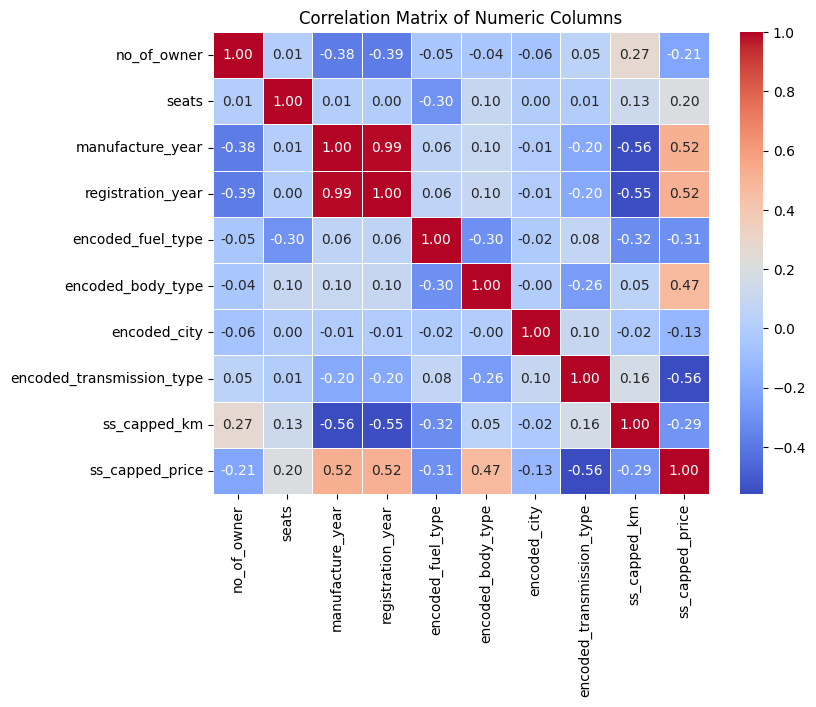

In [306]:
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numeric Columns')

# Display the plot
plt.show()

In [310]:
# Dropping highly correlated features

df_ml_4 = df_ml_3.drop('registration_year', axis=1)
df_ml_4.head()

,no_of_owner,seats,manufacture_year,encoded_fuel_type,encoded_body_type,encoded_city,encoded_transmission_type,ss_capped_km,ss_capped_price
0,3,5,2015,4,2,0,1,1.844475,-0.713344
1,2,5,2018,4,7,0,1,-0.740226,0.126143
2,1,5,2018,4,2,0,1,-1.354823,-0.335473
3,1,5,2014,4,8,0,1,-1.181757,-0.586706
4,1,5,2015,1,7,0,1,0.067926,0.083250


---------------------------------------

Training MOdel

In [321]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [313]:
X = df_ml_4.drop(['ss_capped_price'],axis=1)
Y = df_ml_4['ss_capped_price']

In [316]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [324]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, Y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= Y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= Y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= Y_test, y_pred= pred))

In [325]:
ML_model_df = pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,0.311282,0.557927,0.677212,0.677091
Support Vector Rregression,0.992441,0.996213,0.041643,-0.029511
Decision Tree Regressor,0.356825,0.597348,0.630359,0.629847
Random Forest Regressor,0.208142,0.456226,0.784567,0.784084
Ridge,0.311280,0.557925,0.677215,0.677093
Lasso,0.713269,0.844553,0.260916,0.260089
